In [1]:
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
# 载入模型
model = load_model('./model/modelC-DenseNet169-192.h5')

W0301 18:08:58.612530  8820 deprecation.py:506] From D:\Anaconda\envs\tensorflow\Lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0301 18:08:58.617531  8820 deprecation.py:506] From D:\Anaconda\envs\tensorflow\Lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0301 18:08:58.619532  8820 deprecation.py:506] From D:\Anaconda\envs\tensorflow\Lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is depr

### 混淆矩阵（多分类）

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [4]:
#加载处理好的数据与标签
x_val = np.load('encoded/X_valid_C_192.npy')
y_val = np.load('encoded/Y_valid_C_192.npy')

In [5]:
predictions = model.predict(x_val)
predictions = np.argmax(predictions,axis=1)

In [6]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    con_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    con_mat_norm = np.around(con_mat_norm, decimals=4)
    plt.figure(figsize=(16, 16))
    plot_confusion_matrix(con_mat_norm, range(np.max(truelabel)+1))

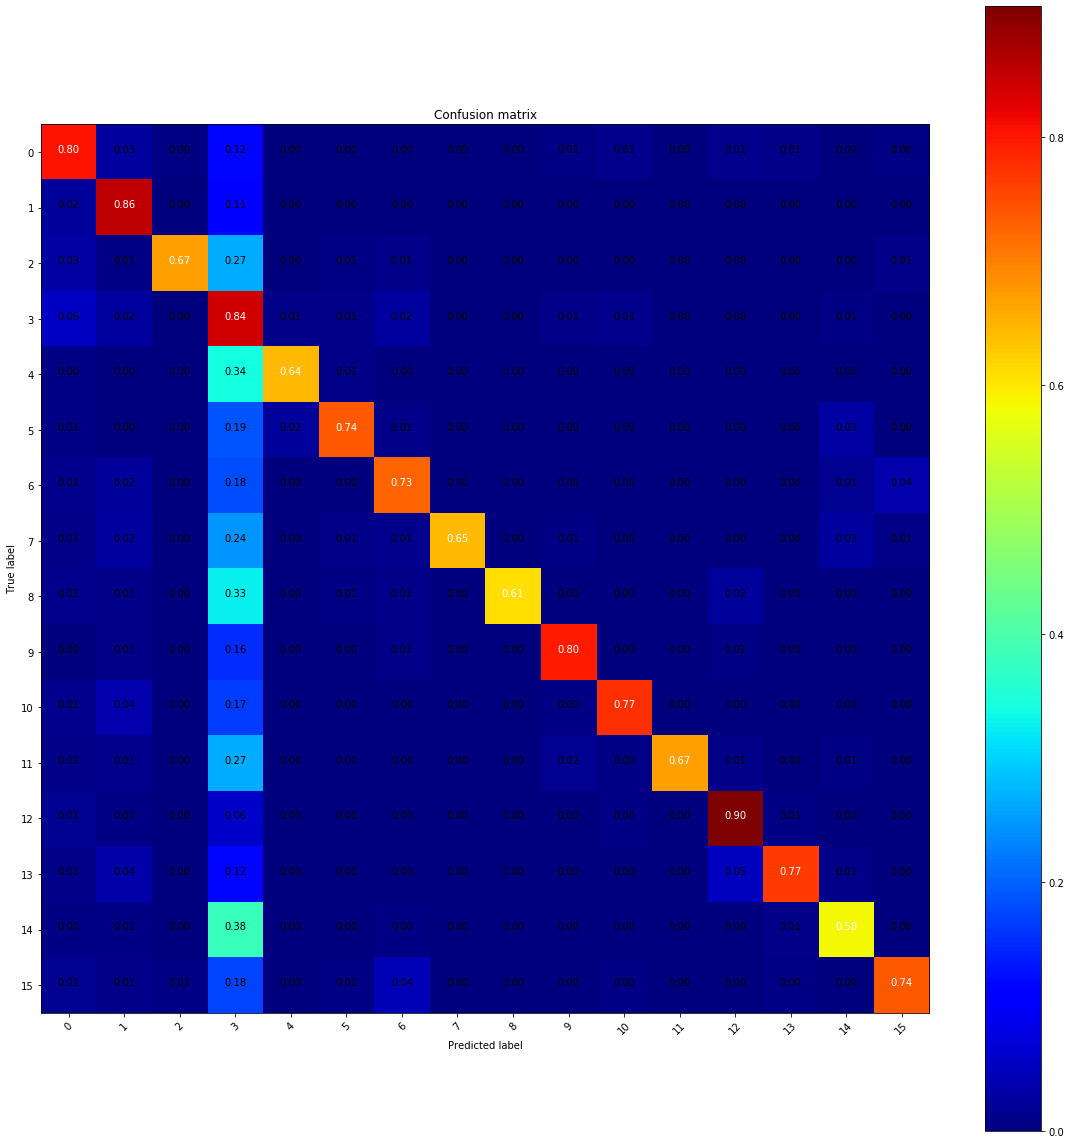

In [7]:
import itertools
x_val.shape	# (25838, 48, 48, 1)
y_val.shape	# (25838, 7)
plot_confuse(model, x_val, y_val)

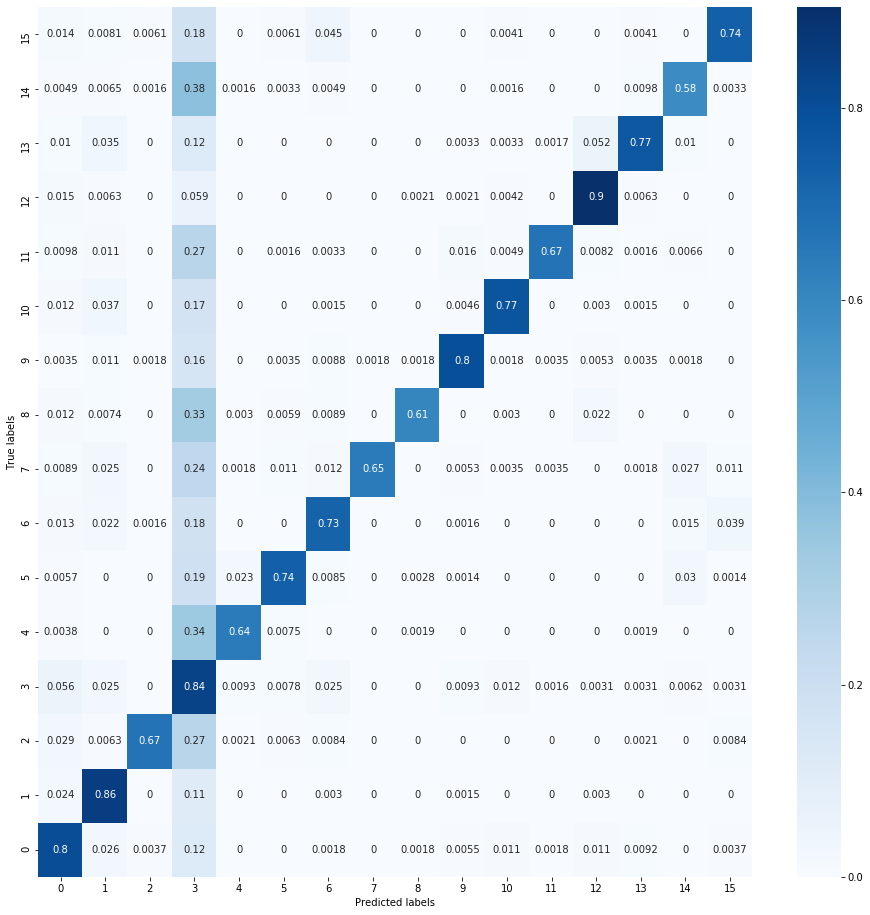

In [8]:
import seaborn as sns

# === 混淆矩阵：真实值与预测值的对比 ===
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
truelabel = y_val.argmax(axis=-1)
con_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=4)

# === plot ===
plt.figure(figsize=(16, 16))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 16)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### 单张图片预测

In [24]:
image_path = './testingC/C0paper_recycle/0a0cf815be0355dcf80d849455255816.jpg'

# 加载图像
img = image.load_img(image_path, target_size=(192, 192))

# 图像预处理
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

两次训练时，网络结构不同。
第一次用的网络是在model=Sequential()下添加模块的的方法，Sequential class可以使用model.predict_classes()；第二次用的网络是编写好网络结构后使用model=Model(input=mnist_input,outputs=output)综合起来的方法，也就是Model class，无法使用model.predict_classes()，但是可以使用组合形式预测：

In [27]:
# 输出分类
predict = model.predict(x)
predict=np.argmax(predict,axis=1)
#pred_r = model.predict_classes(x)
print(predict)

[0]


In [ ]:
# 模型测试
import cv2 as cv
import numpy as np
from keras.models import load_model

model = load_model('model0903.h5')
image_path = './training/_0paper/paper (109).jpg'
# image_path = 'C:\\Users\\lenovo\\Desktop\\test\\qwe.jpg'
img = cv.cvtColor(cv.imread(image_path),cv.COLOR_BGR2RGB)
img = cv.resize(img, (192,192))

 #需要用reshape定义出例子的个数，图片的 通道数，图片的长与宽。具体的参加keras文档
image = (img.reshape(1,192, 192, 3)).astype('int32')/255 
predict = model.predict_classes(image)
print ('识别为：')
print (predict)

cv.imshow("Image1", img)
cv.waitKey(0)

# 时间复杂度较高 待优化
# 颜色通道 黄绿？